# Gold & Silver Futures Analysis with Prophet

This is designed to be run on Google Colab

In [1]:
!pip install prophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_csv(url):
    return pd.read_csv(url, parse_dates=["date"])

gold_futures_df = read_csv("https://raw.githubusercontent.com/itaylor1645/project_1/main/Resources/Gold_Futures.csv")
silver_futures_df = read_csv("https://raw.githubusercontent.com/itaylor1645/project_1/main/Resources/Silver_Futures.csv")

## Gold Components

In [3]:
gold_futures_prophet_df = gold_futures_df[["date", "close"]].rename(columns={"date": "ds", "close": "y"}).dropna()
model_gold_futures = Prophet()
model_gold_futures.fit(gold_futures_prophet_df)
forecast_gold_futures = model_gold_futures.predict(gold_futures_prophet_df[["ds"]])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_bq07oq9/_nm9z0ra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_bq07oq9/4vpbfzqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37474', 'data', 'file=/tmp/tmp_bq07oq9/_nm9z0ra.json', 'init=/tmp/tmp_bq07oq9/4vpbfzqh.json', 'output', 'file=/tmp/tmp_bq07oq9/prophet_modelb19zhn4k/prophet_model-20240514145406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


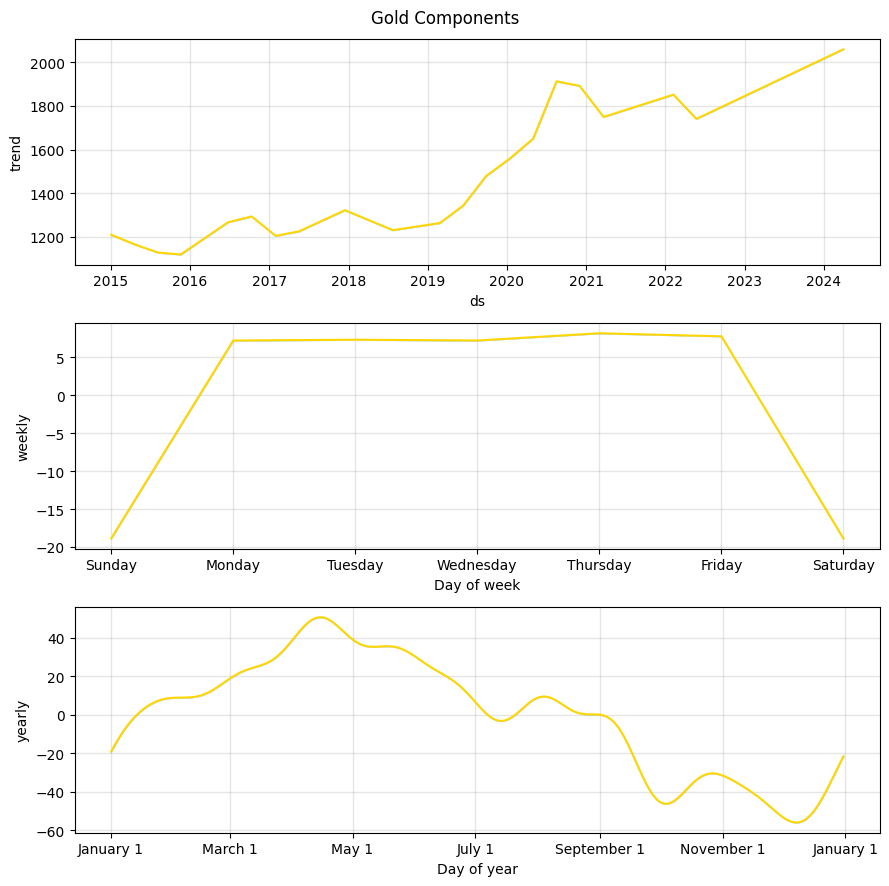

In [4]:
fig = model_gold_futures.plot_components(forecast_gold_futures)
fig.suptitle("Gold Components")
fig.tight_layout()
axs = fig.get_axes()
for ax in axs:
    for line in ax.get_lines():
        line.set_color('gold')
plt.show()

## Silver Components

In [5]:
silver_futures_prophet_df = silver_futures_df[["date", "close"]].rename(columns={"date": "ds", "close": "y"}).dropna()
model_silver_futures = Prophet()
model_silver_futures.fit(silver_futures_prophet_df)
forecast_silver_futures = model_silver_futures.predict(silver_futures_prophet_df[["ds"]])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_bq07oq9/k_pc07j1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_bq07oq9/wsr9cr40.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55976', 'data', 'file=/tmp/tmp_bq07oq9/k_pc07j1.json', 'init=/tmp/tmp_bq07oq9/wsr9cr40.json', 'output', 'file=/tmp/tmp_bq07oq9/prophet_modelojg62fq3/prophet_model-20240514145411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


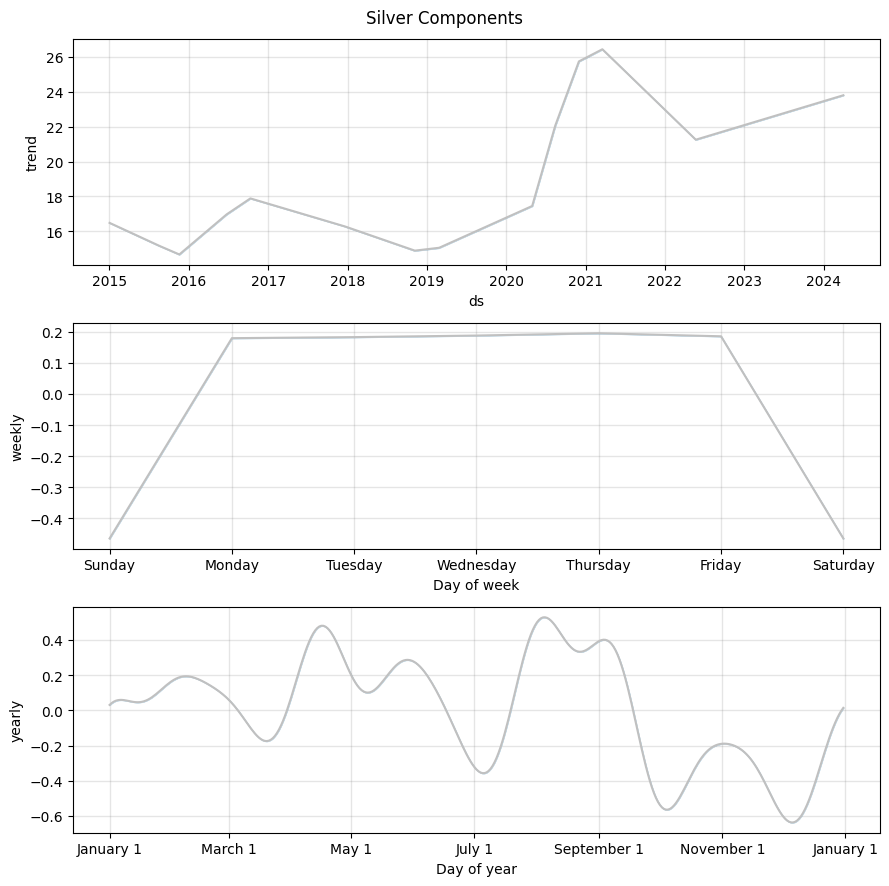

In [6]:
fig = model_silver_futures.plot_components(forecast_silver_futures)
fig.suptitle("Silver Components")
fig.tight_layout()
axs = fig.get_axes()
for ax in axs:
    for line in ax.get_lines():
        line.set_color('silver')
plt.show()